downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Tsegaye\scikit_learn_data


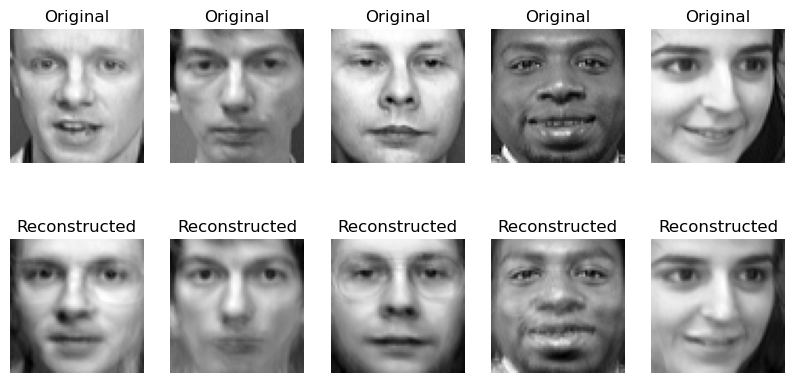

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning
from sklearn.datasets import fetch_olivetti_faces

# Load dataset (Olivetti Faces - can be replaced with custom images)
data = fetch_olivetti_faces(shuffle=True, random_state=42)
images = data.images  # Shape (400, 64, 64)

# Flatten images into vectors (each row is an image)
X = images.reshape(len(images), -1)  # Shape (400, 4096)

# Apply Dictionary Learning
n_components = 100  # Number of dictionary atoms
dict_learner = DictionaryLearning(n_components=n_components, transform_algorithm='lasso_lars', random_state=42)
X_transformed = dict_learner.fit_transform(X)  # Sparse representation

# Reconstruct images
X_reconstructed = X_transformed @ dict_learner.components_

# Reshape back to image dimensions
reconstructed_images = X_reconstructed.reshape(len(images), 64, 64)

# Display original vs. reconstructed images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title("Original")

    axes[1, i].imshow(reconstructed_images[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Reconstructed")

plt.show()
